In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [105]:
# Read in the csvs that we will use
species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

# Observations

In [139]:
# View the full 'Observations' data set 
fig = go.Figure(data=[go.Table(
    header=dict(values=list(observations.columns),
                fill_color='lightslategray',
                align='left',
                font = dict(color = 'white', size = 12)),
    cells=dict(values=[observations.scientific_name, observations.park_name, observations.observations],
               fill_color='ghostwhite',
               align='left'))
])

fig.show()

In [108]:
# Find the total number of observations recorded
total_observations = observations['observations'].sum()
total_observations

3314739

In [109]:
# Use GroupBy() to compute the total observations for each park
df = observations.groupby('park_name').sum()
df = df.reset_index(level=0)
# Altering park names
df.park_name = df.park_name.str.strip('National Park')
df

park_name  observations
0                  Bryce        576025
1  Great Smoky Mountains        431820
2            Yellowstone       1443562
3               Yosemite        863332

In [110]:
df['proportion_of_total%'] = round(100 * df['observations']/total_observations, 2)
df

park_name  observations  proportion_of_total%
0                  Bryce        576025                 17.38
1  Great Smoky Mountains        431820                 13.03
2            Yellowstone       1443562                 43.55
3               Yosemite        863332                 26.05

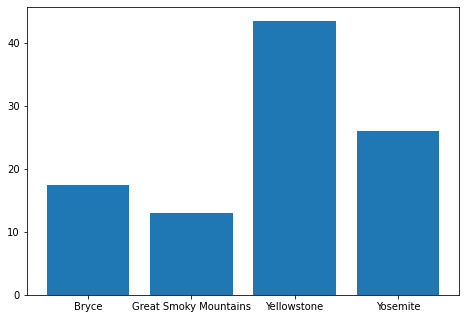

In [141]:
# Bar chart using Matplotlib
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['park_name'],df['proportion_of_total%'])
# Fontsize of tick labels
plt.xticks(fontsize=10)
plt.show()

In [142]:
# Bar chart using plotly
colors = ['lightslategray',] * 4
colors[1] = 'crimson'
fig = go.Figure([go.Bar(
    x = df['park_name'],
    y = df['proportion_of_total%'],
    marker_color = colors)])
fig.update_layout(title_text = "Proportion of total observations at each National Park",
                  yaxis_title ="Proportion of total observations %",
                  xaxis_title ="National Parks")
fig.show()

In [113]:
grouped = observations.groupby(observations.park_name)
yosemite = grouped.get_group("Yosemite National Park")
great_smoky_mountain = grouped.get_group("Great Smoky Mountains National Park")
yellowstone = grouped.get_group("Yellowstone National Park")
bryce = grouped.get_group("Bryce National Park")

In [114]:
# Get the size of the dataframe
observations.shape

(23296, 3)

In [115]:
yosemite.shape

(5824, 3)

In [116]:
yellowstone.shape

(5824, 3)

In [117]:
great_smoky_mountain.shape

(5824, 3)

In [134]:
# Plot a scatterplot of the number of observations
fig = go.Figure(data=go.Scattergl(x=observations.index, y=observations['observations'], mode='markers', marker=dict(line_width=0.8)))

fig.show()

In [135]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=yellowstone['observations'],
    name='Yellowstone',
    marker_color='yellow'
))

fig.add_trace(go.Scatter(
    y=yosemite['observations'],
    name='Yosemite',
    mode='markers',
    marker_color='pink'
))

fig.add_trace(go.Scatter(
    y=bryce['observations'],
    name='Bryce',
    marker_color='green'
))

fig.add_trace(go.Scatter(
    y=great_smoky_mountain['observations'],
    name='Great Smoky Mountain',
    marker_color='lightslategray'
))

# Set options common to all traces with fig.update_traces
fig.update_traces(mode='markers', marker_line_width=0.8, marker_size=6)
fig.update_layout(title='National Parks Observations',
                  yaxis_zeroline=False, xaxis_zeroline=False)


fig.show()

# Species

In [15]:
species_info.shape

(5824, 4)

In [16]:
print(species_info.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [17]:
# Iterating the columns in species_info
for col in species_info.columns:
    print(col)

category
scientific_name
common_names
conservation_status
